In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd

from sklearn.metrics import confusion_matrix
import seaborn as sb

In [2]:
# define constant

FOLDER = 'datas/s40d30t1.5/'
GESTURES = ["l", "r", "u", "d", "unknown"]

DATA_POINT_PER_GESTURE = 30


SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Process data

In [3]:
inputs = []
outputs = []

ONE_HOTS = np.eye(len(GESTURES))

for i in range(len(GESTURES)):
    g = GESTURES[i]
    print(f"Processing {i} for gesture '{g}'.")
    
    output = ONE_HOTS[i]
    
    df = pd.read_csv(FOLDER + g + '.csv')
    num_recordings = int(df.shape[0] / DATA_POINT_PER_GESTURE)
    
    for j in range(num_recordings):
        tensor = []
        
        for k in range(DATA_POINT_PER_GESTURE):
            kk = j * DATA_POINT_PER_GESTURE + k
            
            tensor += [
                df['aX'][kk],
                df['aY'][kk],
                df['aZ'][kk],
                df['gX'][kk],
                df['gY'][kk],
                df['gZ'][kk],
#                 df['mX'][kk],
#                 df['mY'][kk],
#                 df['mZ'][kk],
            ]
            
        inputs.append(tensor)
        outputs.append(output)

Processing 0 for gesture 'l'.
Processing 1 for gesture 'r'.
Processing 2 for gesture 'u'.
Processing 3 for gesture 'd'.
Processing 4 for gesture 'unknown'.


In [4]:
# display(pd.DataFrame(inputs))

## Create train/validate/test datas

In [5]:
rdm_index = np.arange(len(inputs))
np.random.shuffle(rdm_index)

inputs = np.array(inputs)[rdm_index]
outputs = np.array(outputs)[rdm_index]

TRAIN_SPLIT = int(0.5 * len(inputs))
TEST_SPLIT = int(TRAIN_SPLIT + 0.25 * len(inputs))

i_train, i_validate, i_test = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
o_train, o_validate, o_test = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

# do this if data type invalid
i_train = tf.convert_to_tensor(i_train, dtype=tf.float32)
o_train = tf.convert_to_tensor(o_train, dtype=tf.float32)

i_validate = tf.convert_to_tensor(i_validate, dtype=tf.float32)
o_validate = tf.convert_to_tensor(o_validate, dtype=tf.float32)

i_test = tf.convert_to_tensor(i_test, dtype=tf.float32)

## Build and train model

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

EPOCHS=150

In [7]:
def create_model(n1, n2):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n1, activation='relu'),
        tf.keras.layers.Dense(n2, activation='relu'),
        tf.keras.layers.Dense(len(GESTURES), activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(i_train, o_train, epochs=EPOCHS, batch_size=1,validation_data=(i_validate, o_validate))
    
    return model, history


In [8]:
model1, history1 = create_model(32, 16)

Epoch 1/150
100/100 [==============================] - 1s 4ms/step - loss: 1.6196 - accuracy: 0.3100 - val_loss: 1.5645 - val_accuracy: 0.2200
Epoch 2/150
100/100 [==============================] - 0s 2ms/step - loss: 1.5183 - accuracy: 0.3900 - val_loss: 1.4734 - val_accuracy: 0.7200
Epoch 3/150
100/100 [==============================] - 0s 2ms/step - loss: 1.3835 - accuracy: 0.5400 - val_loss: 1.3413 - val_accuracy: 0.4800
Epoch 4/150
100/100 [==============================] - 0s 2ms/step - loss: 1.2363 - accuracy: 0.6300 - val_loss: 1.2010 - val_accuracy: 0.7600
Epoch 5/150
100/100 [==============================] - 0s 2ms/step - loss: 1.0631 - accuracy: 0.7200 - val_loss: 1.0192 - val_accuracy: 0.7400
Epoch 6/150
100/100 [==============================] - 0s 2ms/step - loss: 0.9143 - accuracy: 0.7600 - val_loss: 0.8628 - val_accuracy: 0.8000
Epoch 7/150
100/100 [==============================] - 0s 2ms/step - loss: 0.7453 - accuracy: 0.8300 - val_loss: 0.7414 - val_accuracy: 0.7200

Epoch 58/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.1566 - val_accuracy: 0.9600
Epoch 59/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.1347 - val_accuracy: 0.9600
Epoch 60/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9800
Epoch 61/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 0.9800
Epoch 62/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9600
Epoch 63/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9800
Epoch 64/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy:

Epoch 115/150
100/100 [==============================] - 0s 2ms/step - loss: 8.4616e-04 - accuracy: 1.0000 - val_loss: 0.1480 - val_accuracy: 0.9600
Epoch 116/150
100/100 [==============================] - 0s 2ms/step - loss: 8.0244e-04 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9400
Epoch 117/150
100/100 [==============================] - 0s 2ms/step - loss: 7.8939e-04 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9600
Epoch 118/150
100/100 [==============================] - 0s 2ms/step - loss: 7.7475e-04 - accuracy: 1.0000 - val_loss: 0.1467 - val_accuracy: 0.9600
Epoch 119/150
100/100 [==============================] - 0s 2ms/step - loss: 7.3555e-04 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9600
Epoch 120/150
100/100 [==============================] - 0s 2ms/step - loss: 7.2276e-04 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 0.9600
Epoch 121/150
100/100 [==============================] - 0s 2ms/step - loss: 7.1809e-04 - accuracy: 1.0000

In [9]:
model2, history2 = create_model(16, 8)

Epoch 1/150
100/100 [==============================] - 1s 4ms/step - loss: 1.6480 - accuracy: 0.2300 - val_loss: 1.5757 - val_accuracy: 0.3000
Epoch 2/150
100/100 [==============================] - 0s 2ms/step - loss: 1.5921 - accuracy: 0.2500 - val_loss: 1.5556 - val_accuracy: 0.2400
Epoch 3/150
100/100 [==============================] - 0s 3ms/step - loss: 1.5398 - accuracy: 0.3200 - val_loss: 1.5100 - val_accuracy: 0.4200
Epoch 4/150
100/100 [==============================] - 0s 3ms/step - loss: 1.4989 - accuracy: 0.4000 - val_loss: 1.4559 - val_accuracy: 0.5000
Epoch 5/150
100/100 [==============================] - 0s 2ms/step - loss: 1.4168 - accuracy: 0.4900 - val_loss: 1.3870 - val_accuracy: 0.3800
Epoch 6/150
100/100 [==============================] - 0s 3ms/step - loss: 1.3246 - accuracy: 0.5600 - val_loss: 1.2650 - val_accuracy: 0.5000
Epoch 7/150
100/100 [==============================] - 0s 2ms/step - loss: 1.1435 - accuracy: 0.5600 - val_loss: 1.1171 - val_accuracy: 0.6800

Epoch 58/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9600
Epoch 59/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.1656 - val_accuracy: 0.9600
Epoch 60/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0.9600
Epoch 61/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.1572 - val_accuracy: 0.9600
Epoch 62/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 0.9400
Epoch 63/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.1952 - val_accuracy: 0.9400
Epoch 64/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9900 - val_loss: 0.2347 - val_accuracy:

Epoch 115/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.2157 - val_accuracy: 0.9600
Epoch 116/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2257 - val_accuracy: 0.9600
Epoch 117/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2222 - val_accuracy: 0.9600
Epoch 118/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.2318 - val_accuracy: 0.9600
Epoch 119/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2178 - val_accuracy: 0.9600
Epoch 120/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2282 - val_accuracy: 0.9400
Epoch 121/150
100/100 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9900 - val_loss: 0.3592 - val_ac

In [10]:
model3, history3 = create_model(8, 4)

Epoch 1/150
100/100 [==============================] - 1s 4ms/step - loss: 1.5988 - accuracy: 0.1800 - val_loss: 1.5747 - val_accuracy: 0.1600
Epoch 2/150
100/100 [==============================] - 0s 2ms/step - loss: 1.5355 - accuracy: 0.2800 - val_loss: 1.5470 - val_accuracy: 0.1800
Epoch 3/150
100/100 [==============================] - 0s 3ms/step - loss: 1.4914 - accuracy: 0.2800 - val_loss: 1.5001 - val_accuracy: 0.2400
Epoch 4/150
100/100 [==============================] - 0s 2ms/step - loss: 1.4374 - accuracy: 0.3900 - val_loss: 1.4790 - val_accuracy: 0.3200
Epoch 5/150
100/100 [==============================] - 0s 2ms/step - loss: 1.3860 - accuracy: 0.4800 - val_loss: 1.4225 - val_accuracy: 0.3000
Epoch 6/150
100/100 [==============================] - 0s 2ms/step - loss: 1.3536 - accuracy: 0.5100 - val_loss: 1.3861 - val_accuracy: 0.3600
Epoch 7/150
100/100 [==============================] - 0s 2ms/step - loss: 1.3089 - accuracy: 0.4500 - val_loss: 1.3623 - val_accuracy: 0.3800

Epoch 58/150
100/100 [==============================] - 0s 3ms/step - loss: 0.4990 - accuracy: 0.7900 - val_loss: 0.6292 - val_accuracy: 0.6800
Epoch 59/150
100/100 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7900 - val_loss: 0.6133 - val_accuracy: 0.7400
Epoch 60/150
100/100 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8200 - val_loss: 0.6126 - val_accuracy: 0.7200
Epoch 61/150
100/100 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.8000 - val_loss: 0.5967 - val_accuracy: 0.7000
Epoch 62/150
100/100 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8000 - val_loss: 0.5976 - val_accuracy: 0.7000
Epoch 63/150
100/100 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.8000 - val_loss: 0.6057 - val_accuracy: 0.7400
Epoch 64/150
100/100 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.8100 - val_loss: 0.5890 - val_accuracy:

Epoch 115/150
100/100 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.9100 - val_loss: 0.4338 - val_accuracy: 0.8400
Epoch 116/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.9200 - val_loss: 0.4363 - val_accuracy: 0.9000
Epoch 117/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9300 - val_loss: 0.4414 - val_accuracy: 0.8400
Epoch 118/150
100/100 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.9300 - val_loss: 0.3848 - val_accuracy: 0.8800
Epoch 119/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9800 - val_loss: 0.4106 - val_accuracy: 0.8400
Epoch 120/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.9700 - val_loss: 0.3817 - val_accuracy: 0.9200
Epoch 121/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.9600 - val_loss: 0.4691 - val_ac

In [11]:
model4, history4 = create_model(4, 2)

Epoch 1/150
100/100 [==============================] - 1s 4ms/step - loss: 1.5931 - accuracy: 0.2500 - val_loss: 1.6132 - val_accuracy: 0.1800
Epoch 2/150
100/100 [==============================] - 0s 2ms/step - loss: 1.5749 - accuracy: 0.2900 - val_loss: 1.6040 - val_accuracy: 0.1800
Epoch 3/150
100/100 [==============================] - 0s 3ms/step - loss: 1.5637 - accuracy: 0.3000 - val_loss: 1.5865 - val_accuracy: 0.2800
Epoch 4/150
100/100 [==============================] - 0s 3ms/step - loss: 1.5535 - accuracy: 0.3000 - val_loss: 1.5797 - val_accuracy: 0.2800
Epoch 5/150
100/100 [==============================] - 0s 3ms/step - loss: 1.5389 - accuracy: 0.3500 - val_loss: 1.5600 - val_accuracy: 0.3600
Epoch 6/150
100/100 [==============================] - 0s 2ms/step - loss: 1.5206 - accuracy: 0.3300 - val_loss: 1.5472 - val_accuracy: 0.3600
Epoch 7/150
100/100 [==============================] - 0s 3ms/step - loss: 1.5014 - accuracy: 0.3700 - val_loss: 1.5335 - val_accuracy: 0.4200

Epoch 58/150
100/100 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.5400 - val_loss: 0.9512 - val_accuracy: 0.6000
Epoch 59/150
100/100 [==============================] - 0s 2ms/step - loss: 0.8613 - accuracy: 0.5900 - val_loss: 0.9451 - val_accuracy: 0.5600
Epoch 60/150
100/100 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.5800 - val_loss: 0.9402 - val_accuracy: 0.5200
Epoch 61/150
100/100 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.6100 - val_loss: 0.9367 - val_accuracy: 0.5600
Epoch 62/150
100/100 [==============================] - 0s 2ms/step - loss: 0.8557 - accuracy: 0.5700 - val_loss: 0.9703 - val_accuracy: 0.5600
Epoch 63/150
100/100 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.6400 - val_loss: 0.9474 - val_accuracy: 0.5600
Epoch 64/150
100/100 [==============================] - 0s 2ms/step - loss: 0.8328 - accuracy: 0.6200 - val_loss: 0.9228 - val_accuracy:

Epoch 115/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6700 - val_loss: 0.7602 - val_accuracy: 0.6400
Epoch 116/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6900 - val_loss: 0.8032 - val_accuracy: 0.6200
Epoch 117/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6700 - val_loss: 0.7645 - val_accuracy: 0.6200
Epoch 118/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6900 - val_loss: 0.7746 - val_accuracy: 0.6000
Epoch 119/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6800 - val_loss: 0.7866 - val_accuracy: 0.6400
Epoch 120/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.7200 - val_loss: 0.7493 - val_accuracy: 0.6200
Epoch 121/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6700 - val_loss: 0.7456 - val_ac

In [12]:
models = [model1, model2, model3, model4]
histories = [history1, history2, history3, history4]

## Review models' performance

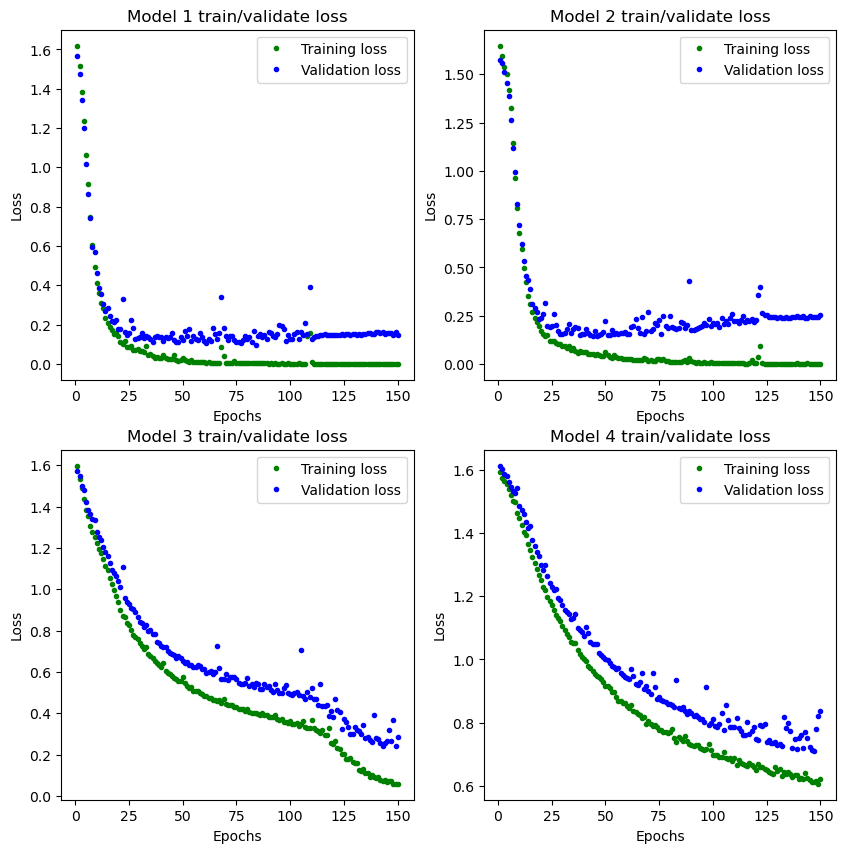

In [13]:
# increase the size of the graphs. The default size is (6,4).
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
def plot_model_loss(history, title, i):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    ax = axs[int(i/2), i % 2]
    ax.plot(epochs, loss, 'g.', label='Training loss')
    ax.plot(epochs, val_loss, 'b.', label='Validation loss')
    ax.set_title(title)
#     ax.xlabel('Epochs')
#     ax.ylabel('Loss')
    ax.set(xlabel='Epochs', ylabel='Loss')
    ax.legend()
#     ax.show()

for i in range(4):
    plot_model_loss(histories[i], 'Model '+ str(i+1) + ' train/validate loss', i)

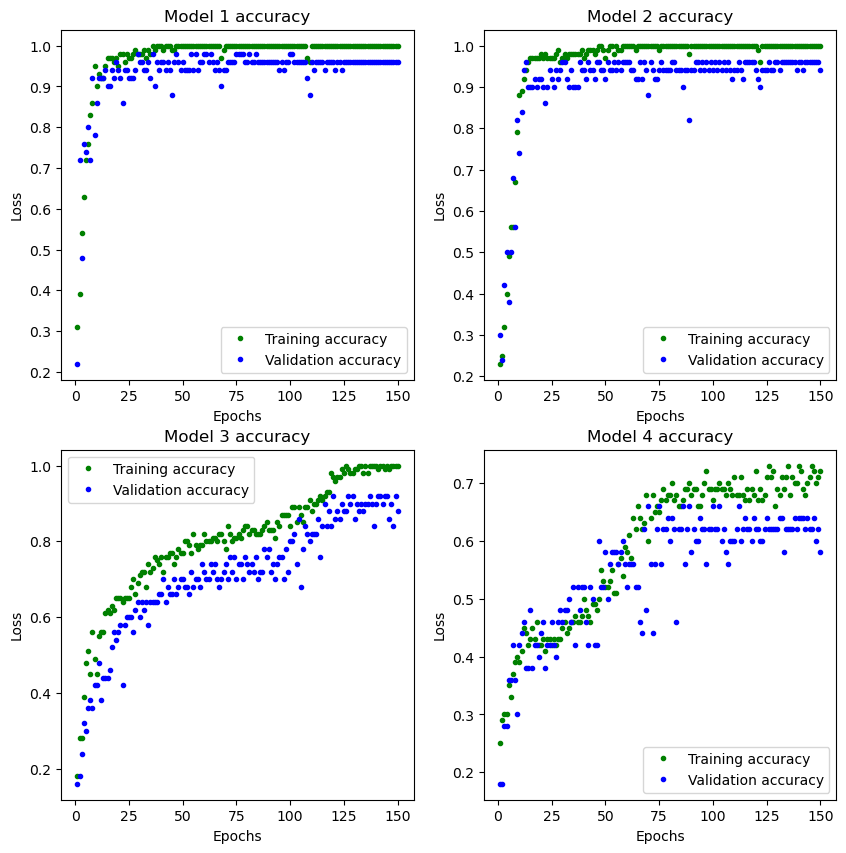

In [14]:
# increase the size of the graphs. The default size is (6,4).
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
def plot_model_accuracy(history, title, i):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)
    
    ax = axs[int(i/2), i % 2]
    ax.plot(epochs, accuracy, 'g.', label='Training accuracy')
    ax.plot(epochs, val_accuracy, 'b.', label='Validation accuracy')
    ax.set_title(title)
    ax.set(xlabel='Epochs', ylabel='Loss')
    ax.legend()

for i in range(4):
    plot_model_accuracy(histories[i], 'Model '+ str(i+1) + ' accuracy', i)

## Verify models with test data

2/2 [==============================] - 0s 3ms/step


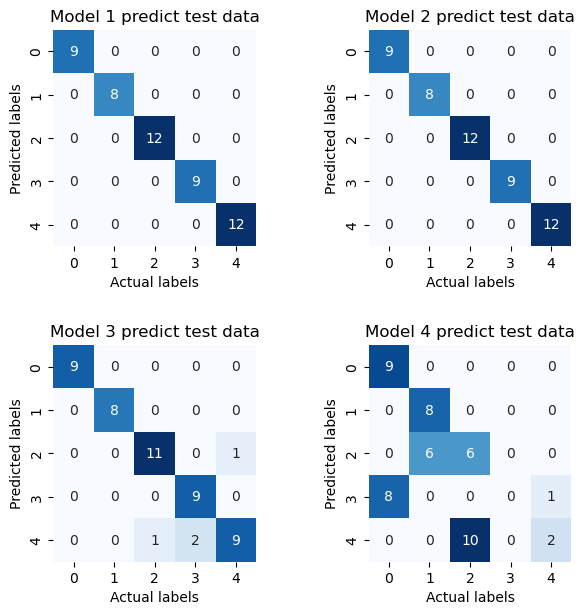

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
fig.tight_layout(pad=5.0)
def plot_cm(model, title, i):
    predict = model.predict(i_test)
    conf_mat = confusion_matrix(np.argmax(o_test, axis=1), np.argmax(predict, axis=1))
    ax = axs[int(i/2), i % 2]
    sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set(xlabel='Actual labels', ylabel='Predicted labels')

for i in range(4):
    plot_cm(models[i], 'Model '+ str(i+1) + ' predict test data', i)

## Produce model file (.tflite)

Output both non-quantized and quantized model files


In [16]:
def representative_dataset_generator():
 # each scalar value inside a 2D array that is wrapped in a list
 for value in inputs:
     yield [np.array(value, dtype=np.float32, ndmin=2)]



for i, model in enumerate(models):
    TFLITE_FILE = 'tflite/gesture_model_' + str(i+1) + '.tflite'
    TFLITE_FILE_Q = 'tflite/gesture_model_' + str(i+1) + 'q.tflite'
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    open(TFLITE_FILE, "wb").write(tflite_model)
    
    converter_q = tf.lite.TFLiteConverter.from_keras_model(model)
    converter_q.optimizations = [tf.lite.Optimize.DEFAULT]
    converter_q.representative_dataset = representative_dataset_generator
    tflite_model_q = converter_q.convert()
    open(TFLITE_FILE_Q, "wb").write(tflite_model_q)
    
    # Review size difference
    basic_model_size = os.path.getsize(TFLITE_FILE)
    print("Basic model{} is {} bytes".format(i, basic_model_size))

    basic_model_size_q = os.path.getsize(TFLITE_FILE_Q)
    print("Quantized model{} is {} bytes".format(i, basic_model_size_q))


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpoudn7plp\assets
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpd_6ix_sd\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpd_6ix_sd\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model0 is 27712 bytes
Quantized model0 is 9400 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpflh_h2tm\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpflh_h2tm\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp2b1nafru\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp2b1nafru\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model1 is 14432 bytes
Quantized model1 is 6016 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp79k7x4sc\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmp79k7x4sc\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmphy6wzsgt\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmphy6wzsgt\assets
C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Basic model2 is 8160 bytes
Quantized model2 is 4416 bytes
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpcnevl7f2\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpcnevl7f2\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmprmj33u_u\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmprmj33u_u\assets


Basic model3 is 5144 bytes
Quantized model3 is 3664 bytes


C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


## Verify the interpreter (.tflite)

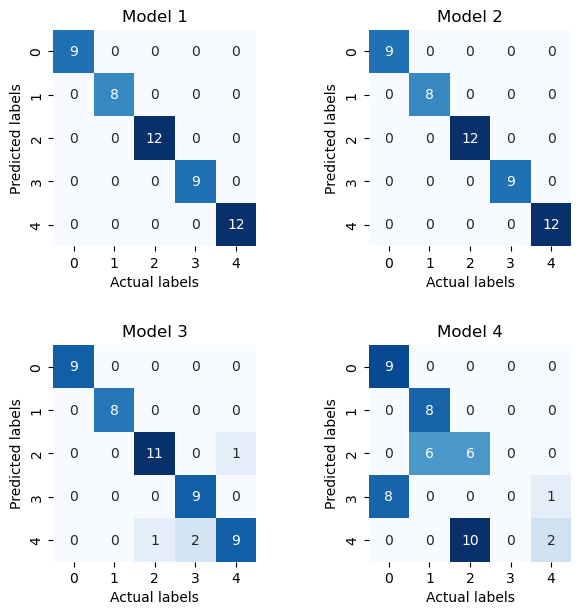

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
fig.tight_layout(pad=5.0)

for i in range(4):
    TFLITE_FILE = 'tflite/gesture_model_' + str(i+1) + '.tflite'
    model = tf.lite.Interpreter(TFLITE_FILE)
    model.allocate_tensors()
    model_input_index = model.get_input_details()[0]['index']
    model_output_index = model.get_output_details()[0]['index']
    predict = []
    for j in i_test:
    # write the value to the input tensor
        i_tensor = tf.convert_to_tensor([j], dtype=tf.float32)
        model.set_tensor(model_input_index, i_tensor)
        # run inference
        model.invoke()
        # read the prediction from the output tensor
        predict.append(model.get_tensor(model_output_index)[0])
        
    ax = axs[int(i/2), i % 2]
    conf_mat = confusion_matrix(np.argmax(o_test, axis=1), np.argmax(predict, axis=1))
    ax = axs[int(i/2), i % 2]
    sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
    ax.set_title("Model " + str(i+1))
    ax.set(xlabel='Actual labels', ylabel='Predicted labels')

## Verify the quantized interpreter (.tflite)

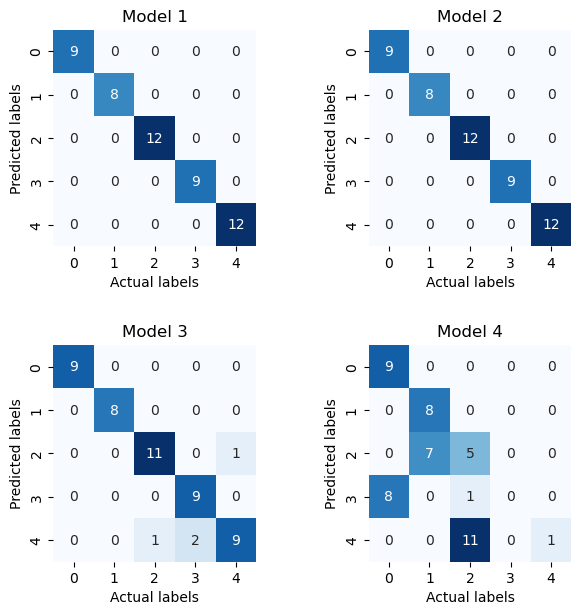

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
fig.tight_layout(pad=5.0)

for i in range(4):
    TFLITE_FILE_Q = 'tflite/gesture_model_' + str(i+1) + 'q.tflite'
    model = tf.lite.Interpreter(TFLITE_FILE_Q)
    model.allocate_tensors()
    model_input_index = model.get_input_details()[0]['index']
    model_output_index = model.get_output_details()[0]['index']
    predict = []
    for j in i_test:
    # write the value to the input tensor
        i_tensor = tf.convert_to_tensor([j], dtype=tf.float32)
        model.set_tensor(model_input_index, i_tensor)
        # run inference
        model.invoke()
        # read the prediction from the output tensor
        predict.append(model.get_tensor(model_output_index)[0])
        
    ax = axs[int(i/2), i % 2]
    conf_mat = confusion_matrix(np.argmax(o_test, axis=1), np.argmax(predict, axis=1))
    ax = axs[int(i/2), i % 2]
    sb.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
    ax.set_title("Model " + str(i+1))
    ax.set(xlabel='Actual labels', ylabel='Predicted labels')


## Produce the model header file

In [19]:
# to run below command, ensure jupyter notebook is launched under bash terminal (eg. git bash, linux terminal)

for i in range(4):
    TFLITE_FILE = 'tflite/gesture_model_' + str(i+1) + '.tflite'
    TFLITE_FILE_Q = 'tflite/gesture_model_' + str(i+1) + 'q.tflite'
    
    HEADER_FILE = '../ble_client/gesture_model_'+str(i+1)+'.h'
    HEADER_FILE_Q = '../ble_client/gesture_model_'+str(i+1)+'q.h'
    # based model header file
    str1 = "const unsigned char {} [] = {{".format('gesture_model')
    str2 = "};"

    !echo {str1}  > {HEADER_FILE}
    !cat {TFLITE_FILE} | xxd -i >> {HEADER_FILE}
    !echo {str2} >> {HEADER_FILE}

    # quantized model header file
    str3 = "const unsigned char {} [] = {{".format('gesture_model_q')

    !echo {str3}  > {HEADER_FILE_Q}
    !cat {TFLITE_FILE_Q} | xxd -i >> {HEADER_FILE_Q}
    !echo {str2} >> {HEADER_FILE_Q}